## **_Notebook for Capstone III_** ##



In [ ]:
import pandas as pd
from scipy import stats
from scipy.stats.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# File to use for upload https://data.cdc.gov/api/views/95ax-ymtc/rows.csv?accessType=DOWNLOAD

from google.colab import files
uploaded = files.upload()


Saving Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv to Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv


In [ ]:
#getting my csv file and connecting to database

df = pd.read_csv('Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv')

In [ ]:
#check all my columns

df.columns

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'FLAG'],
      dtype='object')

In [ ]:
#checking for any signs of null values
# estimate and flag columns are showing null values

df.isnull()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6224,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6225,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6226,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Change the NaN values in the FLAG column to NO since * means yes

df['FLAG'] = df['FLAG'].fillna('NO')

#FILL IN THE ESTIMATES WITH NO VALUE WITH A ZERO

df['ESTIMATE'] = df['ESTIMATE'].fillna(0)

In [ ]:
df['PANEL'].unique()
# I want to get my three groups to compare against one another
# 1.Methadone, 2.Heroin, 3.Synthetic opioids


array(['All drug overdose deaths',
       'Drug overdose deaths involving any opioid',
       'Drug overdose deaths involving natural and semisynthetic opioids',
       'Drug overdose deaths involving methadone',
       'Drug overdose deaths involving other synthetic opioids (other than methadone)',
       'Drug overdose deaths involving heroin'], dtype=object)

## **_Hypothesis #1_**
**Null Hypothesis:** There is no correlation between death rates depending on heroin, methadone, and synthetic opioids overdoses:

**Alternate Hypothesis:** Death rates between different drug types are correlated. Meaning someone who uses methadone is likely to overdose
as to someone who's a heroin or synthetic opiod user, per 100,000 person poulation.

**- I will be using t-tests and Pearson correlation tests to show a sign of correlation if it exsist.**

 - Drug overdose deaths involving heroin
 - Drug overdose deaths involving methadone
 - Drug overdose deaths involving other synthetic opioids


In [ ]:
# Create a dataframe with the values I need with the .iloc and .concat functions on the main data frame

methadone_df = df.iloc[(df['PANEL'] == 'Drug overdose deaths involving methadone').values]
heroin_df =df.iloc[(df['PANEL'] == 'Drug overdose deaths involving heroin').values]
opioids_df = df.iloc[(df['PANEL'] == 'Drug overdose deaths involving other synthetic opioids (other than methadone)').values]

drug_df = pd.concat([methadone_df, heroin_df, opioids_df], ignore_index=True)

estimate_df = drug_df[['PANEL', 'ESTIMATE']]

pivoted_df = estimate_df.pivot_table(index=estimate_df.index, columns='PANEL', values='ESTIMATE')

pivoted_df.rename(columns={'Drug overdose deaths involving methadone': 'Methadone', 'Drug overdose deaths involving heroin': 'Heroin', 'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic Opioids'}, inplace=True)

pivoted_df[['Methadone', 'Heroin', 'Synthetic Opioids']] = pivoted_df[['Methadone', 'Heroin', 'Synthetic Opioids']].fillna(0)

# Create my columns with each drug type and also re-naming them so its easier to read.

In [ ]:
# Run my t-test for every drug against every other one

#
print(stats.ttest_ind(pivoted_df['Methadone'], pivoted_df['Heroin']))
# Meth vs Heroin Ttest_indResult(statistic=-7.030600666530709, pvalue=2.276178186303634e-12)

print(stats.ttest_ind(pivoted_df['Methadone'], pivoted_df['Synthetic Opioids']))
# Meth vs Syn Ttest_indResult(statistic=-6.0981337386359264, pvalue=1.1375100841530425e-09)

print(stats.ttest_ind(pivoted_df['Heroin'], pivoted_df['Synthetic Opioids']))
# Heroin vs Syn Ttest_indResult(statistic=-0.7937560706385506, pvalue=0.42736770147139025)




Ttest_indResult(statistic=-7.030600666530709, pvalue=2.276178186303634e-12)
Ttest_indResult(statistic=-6.0981337386359264, pvalue=1.1375100841530425e-09)
Ttest_indResult(statistic=-0.7937560706385506, pvalue=0.42736770147139025)


**Out of all three test the closest t-test with a sign of correlation between drug types would be the Heroin & Synthetic Opioids test with the standard deviation difference between both means being so small (0.79) along with such a small p-value (0.42). Could imply a sign of real correlation there!**

In [ ]:
pivoted_df[['Methadone', 'Heroin', 'Synthetic Opioids']].corr()

PANEL,Methadone,Heroin,Synthetic Opioids
PANEL,,,
Methadone,1.000000,-0.142032,-0.107583
Heroin,-0.142032,1.000000,-0.081936
Synthetic Opioids,-0.107583,-0.081936,1.000000


NOTE:**With my table visualization you can see all negative numbers for every drug matched with an opposing drug. Negatives indicate that a negative relationship exsist.**

In [ ]:
stats.pearsonr(pivoted_df['Heroin'], pivoted_df['Synthetic Opioids'])

PearsonRResult(statistic=-0.08193632217341093, pvalue=4.690510540425008e-06)

NOTE:**I decided to also further my testing for Heroin vs Syntheic Opioids, in my Pearson test. And the p-value(4.69) was high enough to tell a significant correlation between these two variables just did not exsist. Typically you want a p-value as low as 0.05!**

## **Summary of findings for hypothesis #1:**
There is no significant correlation of deaths between different drug types. The t-test and pearson test show no signs of correlation.
 **Null hypothesis is supported**.

## **_Hypothesis #2_**
**Null Hypothesis:** There is no difference between deathrates depending on the type of gender (M or F).

**Alternate Hypothesis:** Average deathrates between genders (M & F) do influence a 				difference in deathrates.

**-  I will  use the independents samples t-test to check for average death rates differences between Male & Female.**

In [ ]:
# I want to see what values im working with for Male & Female

df['STUB_LABEL'].unique()

array(['All persons', 'Male', 'Female', 'Male: White',
       'Male: Black or African American',
       'Male: American Indian or Alaska Native',
       'Male: Asian or Pacific Islander', 'Female: White',
       'Female: Black or African American',
       'Female: American Indian or Alaska Native',
       'Female: Asian or Pacific Islander',
       'Male: Hispanic or Latino: All races',
       'Male: Not Hispanic or Latino: White',
       'Male: Not Hispanic or Latino: Black',
       'Male: Not Hispanic or Latino: American Indian or Alaska Native',
       'Male: Not Hispanic or Latino: Asian or Pacific Islander',
       'Female: Hispanic or Latino: All races',
       'Female: Not Hispanic or Latino: White',
       'Female: Not Hispanic or Latino: Black',
       'Female: Not Hispanic or Latino: American Indian or Alaska Native',
       'Female: Not Hispanic or Latino: Asian or Pacific Islander',
       'Under 15 years', '15-24 years', '25-34 years', '35-44 years',
       '45-54 years', 

In [ ]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind

In [ ]:
# Get male and female death numbers in their own dataframes

male_df = df.iloc[(df['STUB_LABEL'] == 'Male').values]
female_df = df.iloc[(df['STUB_LABEL'] == 'Female').values]

In [ ]:
male_deaths_df = male_df[['STUB_LABEL', 'ESTIMATE']]
female_deaths_df = female_df[['STUB_LABEL', 'ESTIMATE']]

male_deaths_df.describe()
# Male statistics

,ESTIMATE
count,240.000000
mean,6.001667
std,6.355724
min,0.300000
25%,1.275000
50%,3.750000
75%,8.700000
max,29.100000


In [ ]:
female_deaths_df.describe()

# Female statistics

,ESTIMATE
count,240.000000
mean,3.150417
std,3.421982
min,0.200000
25%,0.700000
50%,1.600000
75%,4.450000
max,14.400000


Run an independent-samples t-test on the DataFrames to see if there is a significant difference between deaths relative to gender type.

In [ ]:

stats.ttest_ind(male_deaths_df['ESTIMATE'], female_deaths_df['ESTIMATE'])
# P-Value = 1.95924037495702e-09

Ttest_indResult(statistic=6.119281705347269, pvalue=1.95924037495702e-09)

There is a difference of 6.1 standard deviations between these two means. With the p-value(1.9) being small, it's implying that this is a difference between M & F deaths!

In [ ]:
# Calculate the sample size, mean, and variance of male & female.

sample_1_n = male_deaths_df.shape[0]
sample_2_n = female_deaths_df.shape[0]
sample_1_mean = male_deaths_df['ESTIMATE'].mean()
sample_2_mean = female_deaths_df['ESTIMATE'].mean()
sample_1_var = male_deaths_df['ESTIMATE'].var()
sample_2_var = female_deaths_df['ESTIMATE'].var()

In [ ]:
import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -3.7645026118411247 and -1.9379973881588766.


**The confidence interval shows that the average(mean) deaths for males almost doubles the average of female deaths!**

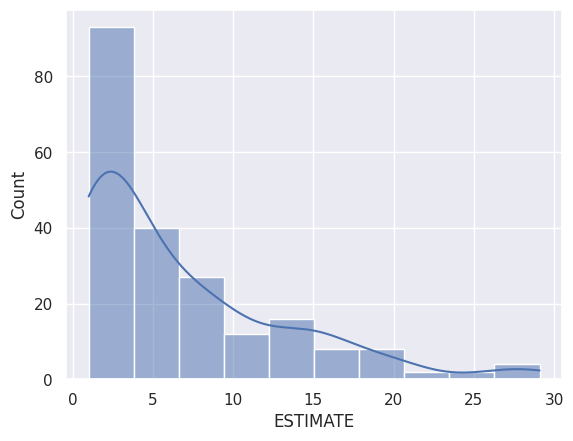

In [ ]:
new_male_df = male_deaths_df[male_deaths_df['ESTIMATE'] >= 1]

ax = sns.histplot(new_male_df['ESTIMATE'], bins=10, kde=True)
# Male histogram

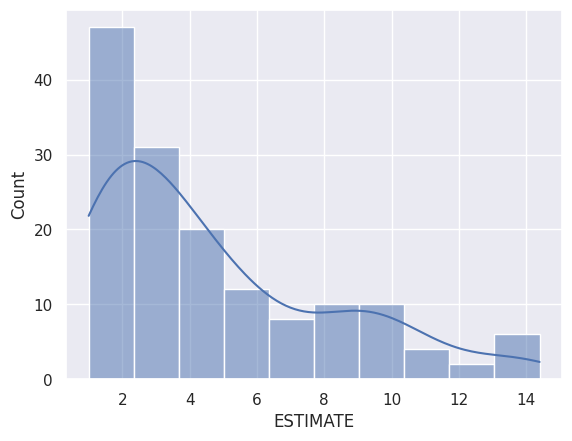

In [ ]:
new_female_df = female_deaths_df[female_deaths_df['ESTIMATE'] >= 1]
ax = sns.histplot(new_female_df['ESTIMATE'], bins=10, kde=True)
# Female histogram

In [ ]:
# The histogram chart for males has a higher count for the y-axis and the bins in the x-axis just double the female chart bins.

In [ ]:
male_deaths_df['ESTIMATE'].sum()

1440.4

In [ ]:
female_deaths_df['ESTIMATE'].sum()

756.0999999999999

## **Summary of findings for hypothesis #2:** ##

The t-test and even the histogram charts show that there is a significant difference between deaths for different genders. This means that males who use drugs are more likely to have a fatal overdose rather than a female who uses drugs. **Reject the null hypothesis.**